# Analysis of Simulator Data

In [1]:
import random as rnd
import operator
import os
import matplotlib.pyplot as plt                 # import matplotlib
import numpy as np                              # import numpy
import time
import copy
import json

import dm_bargain
import dm_travel
import dm_agents
import dm_env as env
import dm_utils as dm
import dm_simulator as sim

# Step One - Get simulator config data

In [2]:
sim_name = "dm_test"
path = "C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/"
config = json.load(open(path + sim_name + "/config.json", "r"))
print(config)

{'controls': {'num_weeks': 100, 'num_periods': 7, 'num_rounds': 30, 'grid_size': 1, 'num_traders': 20, 'num_units': 5}, 'treatments': {'grid_size': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}}


# Step Two - Prepare treatment data reader

In [3]:

def get_data(sim_name, treat_name, series_name):
    path = "C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/"
    sub_path = path + sim_name + '/' + treat_name
    print(sub_path)
    Results = json.load(open(sub_path + "/Results_json.json", "r"))
    data = []
    for result in Results:
        datum = Results[result][series_name]
        data.append(datum)
    return data

treat_name = "_grid_size_1"
series_name = 'actual surplus'
data_series = get_data(sim_name, treat_name, series_name)
print(data_series)

C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_1
[2196, 1842, 1380, 1875, 1728, 1487, 1352, 1799, 1731, 1466, 1777, 1854, 1786, 1724, 1756, 1550, 1619, 2031, 1945, 2014, 1471, 1430, 1386, 1786, 1798, 1621, 1548, 1656, 1593, 1616, 1715, 1716, 1787, 1705, 1765, 1834, 1799, 1725, 1882, 1801, 1705, 1792, 1681, 1565, 1826, 1531, 2009, 1733, 1894, 1570, 1651, 1706, 1453, 1780, 1888, 1758, 1843, 1785, 1818, 1821, 1816, 1796, 1808, 1880, 1393, 1962, 1789, 1750, 1765, 1781, 1950, 1782, 2034, 1705, 1798, 1595, 1830, 1661, 1640, 1971, 1677, 1910, 1646, 1668, 1643, 1846, 1694, 1396, 1635, 1644, 1509, 1810, 1984, 1756, 1690, 2012, 1759, 1844, 1656, 1722]


# Step Four - Collect `data_table`


In [4]:
treatments = config['treatments']
print(treatments)
key = 'grid_size'
series_name = 'actual surplus'
data_table = []
for treat in treatments[key]:
    treat_name = '_' + key + '_' + str(treat)
    data_series = get_data(sim_name, treat_name, series_name)
    data_table.append(data_series)

{'grid_size': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_1
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_3
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_5
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_7
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_9
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_11
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_13
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_15
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_17
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_test/_grid_size_19


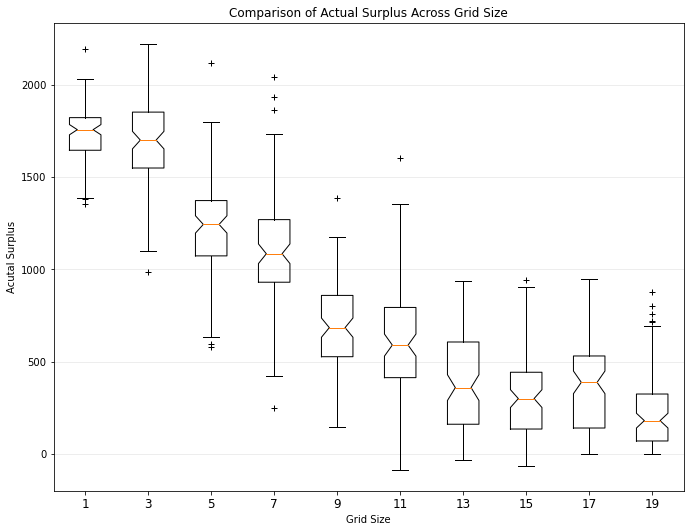

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Comparison of Actual Surplus Across Grid Size',
    xlabel='Grid Size',
    ylabel='Acutal Surplus',
)

ax1.set_xticklabels(treatments[key], fontsize=12)

plt.show()

# All Together Now

{'controls': {'num_weeks': 100, 'num_periods': 7, 'num_rounds': 30, 'grid_size': 1, 'num_traders': 20, 'num_units': 8}, 'treatments': {'grid_size': [1, 2, 3, 4, 5]}}
{'grid_size': [1, 2, 3, 4, 5]}
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_zidp_30_8/_grid_size_1
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_zidp_30_8/_grid_size_2
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_zidp_30_8/_grid_size_3
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_zidp_30_8/_grid_size_4
C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/dm_zidp_30_8/_grid_size_5


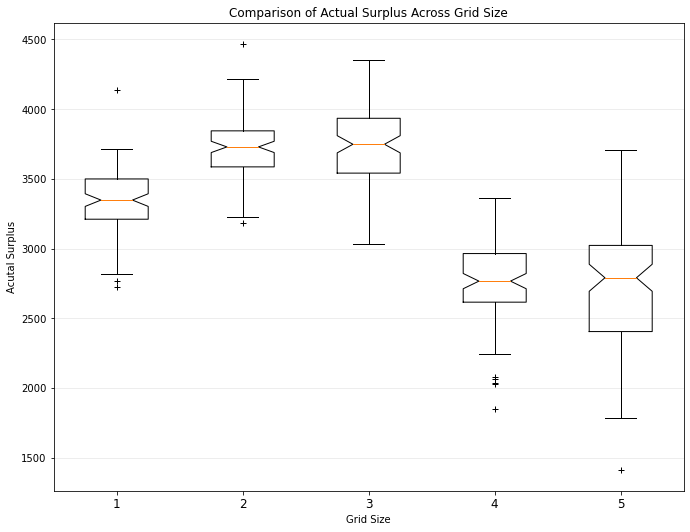

In [12]:
def get_data(sim_name, treat_name, series_name):
    path = "C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/"
    sub_path = path + sim_name + '/' + treat_name
    print(sub_path)
    Results = json.load(open(sub_path + "/Results_json.json", "r"))
    data = []
    for result in Results:
        datum = Results[result][series_name]
        data.append(datum)
    return data

sim_name = "dm_zidp_30_8"
path = "C:/Users/Desktop/repo/adaptive_markets/project_dm/modules/"
config = json.load(open(path + sim_name + "/config.json", "r"))
print(config)

treatments = config['treatments']
print(treatments)
key = 'grid_size'
series_name = 'actual surplus'
data_table_1 = []
for treat in treatments[key]:
    treat_name = '_' + key + '_' + str(treat)
    data_series = get_data(sim_name, treat_name, series_name)
    data_table_1.append(data_series)

fig, ax1 = plt.subplots(figsize=(10, 10))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table_1, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Comparison of Actual Surplus Across Grid Size',
    xlabel='Grid Size',
    ylabel='Acutal Surplus',
)

ax1.set_xticklabels(treatments[key], fontsize=12)

plt.show()

# Compare Treatments

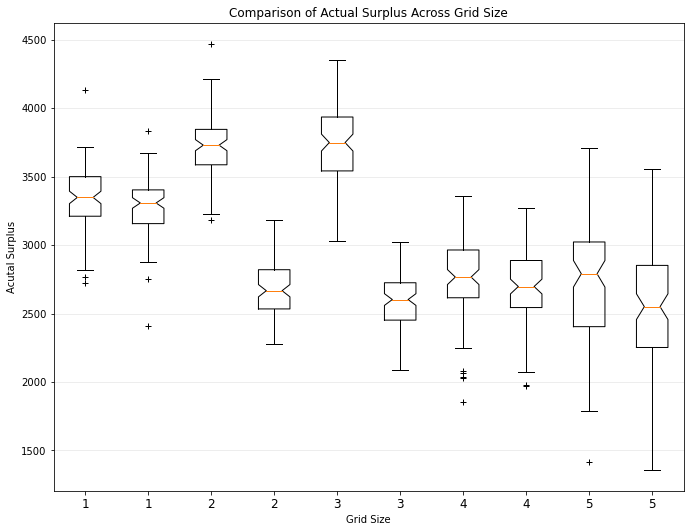

In [13]:
new_table = []
for d_1, d_2 in zip(data_table_1, data_table_2):
    new_table.extend([d_1, d_2])

series_labels = []
for k in treatments[key]:
    series_labels.extend([k, k])
    
fig, ax1 = plt.subplots(figsize=(10, 10))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(new_table, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Comparison of Actual Surplus Across Grid Size',
    xlabel='Grid Size',
    ylabel='Acutal Surplus',
)

ax1.set_xticklabels(series_labels, fontsize=12)

plt.show()